
# Group Project in AI Applied to Engineering

##### Nima Salihzada, Tarjei Åkre Reite and Sanna Hartman Sellæg

This notebook contains the code used to carry out the first part of the group work in the AI Applied to Engineering course.
The code in this notebook examines and pre-processes a dataset with Alzheimer's disease patients. The notebook is structured in the following parts:
1. Load and examine dataset - In this part the dataset is loaded into the workspace, along with an overview and some initial observations about the data. The target variable will also be introduced.
2. Pre-processing - Non-useful variables are removed to simplify further analysis.
3. Univariate analysis - The remaining variables will be examined individually, and presented with relevant stats and plots.
4. Bivariate analysis - The variables will be compared with each other by correlation.
5. Data preparation - The data will be prepared for further modelling by dividing it into training and testing sets, and making any necessary adjustments such as removing missing values or data scaling.


### Data libraries
This project uses the following libraries
* Pandas - Provides many useful tools for data manipulation and management, such as data storage structures like dataframes.
* Matplotlib - Data presentation library that is used to present plots.
* Seaborn - Data presentation library based on matplotlib that specializes in statistical graphics and exploratory data analysis.
* Scikit-learn - This data library contains many useful tools for data analysis, data processing and machine learning tasks.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

## Part 1 - Load and examine dataset

The dataset we are working with is a dataset containing medical data from just over 2100 patients, of whom some have been diagnosed with Alzheimer's disease.
The data was retrieved from: https://www.kaggle.com/datasets/rabieelkharoua/alzheimers-disease-dataset?resource=download

The dataset contains data from __2149__ patients, and has a total of __35__ data variables.

In [2]:
df = pd.read_csv("alzheimers_disease_data.csv")
df.describe()
print(f"The dataset contains {df.shape[0]} rows (patient records) and {df.shape[1]} columns (data variables).")

The dataset contains 2149 rows (patient records) and 35 columns (data variables).


We can examine the data by calling the .head() function and the .describe() function to respectively peek at the first entries in the dataset and get some summarizing statistical data on the various categories.

In [3]:
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PatientID,2149.0,5825.000000,620.507185,4751.000000,5288.000000,5825.000000,6362.000000,6899.000000
Age,2149.0,74.908795,8.990221,60.000000,67.000000,75.000000,83.000000,90.000000
Gender,2149.0,0.506282,0.500077,0.000000,0.000000,1.000000,1.000000,1.000000
Ethnicity,2149.0,0.697534,0.996128,0.000000,0.000000,0.000000,1.000000,3.000000
EducationLevel,2149.0,1.286645,0.904527,0.000000,1.000000,1.000000,2.000000,3.000000
BMI,2149.0,27.655697,7.217438,15.008851,21.611408,27.823924,33.869778,39.992767
Smoking,2149.0,0.288506,0.453173,0.000000,0.000000,0.000000,1.000000,1.000000
AlcoholConsumption,2149.0,10.039442,5.757910,0.002003,5.139810,9.934412,15.157931,19.989293
PhysicalActivity,2149.0,4.920202,2.857191,0.003616,2.570626,4.766424,7.427899,9.987429
DietQuality,2149.0,4.993138,2.909055,0.009385,2.458455,5.076087,7.558625,9.998346


### Initial observations
As we can see, there are many different categories with different looking data in the dataset. The first thing to notice is the different categorical values in the dataset:
* Gender
* Ethnicity
* EducationLevel
* Smoking
* FamilyHistoryAlzheimers
* CardiovascularDisease
* Diabetes
* Depression
* HeadInjury
* Hypertension
* MemoryComplaints
* BehaviourProblems
* Confusion
* Disorientation
* PersonalityChanges
* DifficultyCompletingTasks
* Forgetfulness
* Diagnosis

It should be noted that the categorical data in the data set is represented with numerical values, so no further data processing is needed to convert this data to numerical data.

Also, we notice the Diagnosis variable, which is our target variable. That means that in further analysis we will attempt to predict whether or not a patient has been diagnosed with Alzheimer's disease based on other data.

## Part 2 - Pre-processing
To simplify further analysis, it can be helpful to remove variables that are of little to no use.
The first two variables that can be removed are __PatientID__  and __DoctorInCharge__, since those contain no useful information. We also apply a scaler to the data, to help with further analysis.

In [5]:
df = df.drop(columns=["PatientID", "DoctorInCharge"])

In [6]:
scaler = MinMaxScaler()
scaler.fit(df)
df_array = scaler.transform(df)
df_sc = pd.DataFrame(df_array,columns=df.columns,index=df.index)

The next step is to find out which of the remaining variables provide the least amount of useful information in relation to our target variable. One simple way to rank the different variables is to compare their correlation value to the Diagnosis variable. This will hopefully give some idea of which values it is useful to focus on. 

FunctionalAssessment        -0.364898
ADL                         -0.332346
MemoryComplaints             0.306742
MMSE                        -0.237126
BehavioralProblems           0.224350
SleepQuality                -0.056548
EducationLevel              -0.043966
CholesterolHDL               0.042584
Hypertension                 0.035080
FamilyHistoryAlzheimers     -0.032900
CholesterolLDL              -0.031976
Diabetes                    -0.031508
CardiovascularDisease        0.031490
BMI                          0.026343
Disorientation              -0.024648
CholesterolTriglycerides     0.022672
HeadInjury                  -0.021411
Gender                      -0.020975
PersonalityChanges          -0.020627
Confusion                   -0.019186
SystolicBP                  -0.015615
Ethnicity                   -0.014782
DifficultyCompletingTasks    0.009069
DietQuality                  0.008506
AlcoholConsumption          -0.007618
CholesterolTotal             0.006394
PhysicalActi

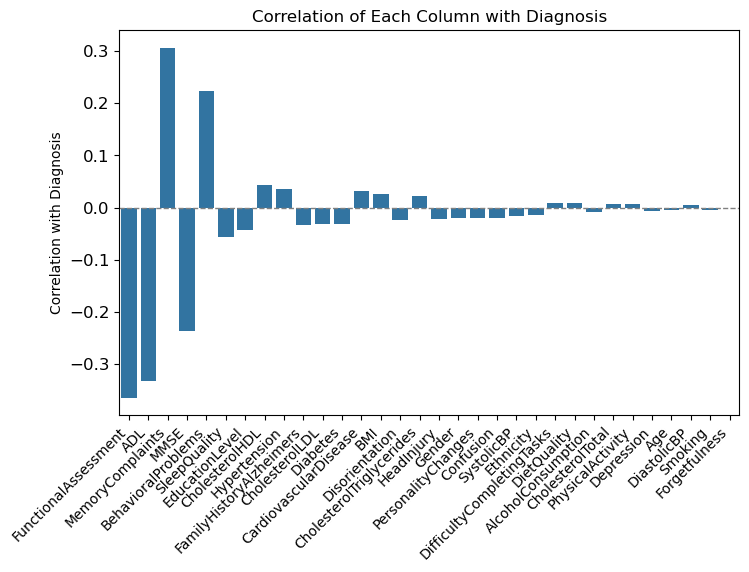

In [7]:
corr_values = df_sc.corr()["Diagnosis"].drop("Diagnosis")
corr_values = corr_values.reindex(corr_values.abs().sort_values(ascending=False).index)
print(corr_values)

plt.figure(figsize=(8, 5))
sns.barplot(x=corr_values.index, y=corr_values.values)

# Add labels and title
plt.axhline(0, color='gray', linestyle='--', linewidth=1)  # Add a zero reference line
plt.ylabel('Correlation with ' + "Diagnosis")
plt.xlabel('')
plt.title('Correlation of Each Column with ' + "Diagnosis")
plt.xticks(rotation=45, ha='right', fontsize=10)  # Adjust rotation, alignment, and size
plt.yticks(fontsize=12)  # Adjust y-axis font size

plt.show()

The dataset has many columns, so we need to remove variables that contribute little or no information. We chose to filter columns based on an absolute correlation threshold.

#### Observations
The code above ranks the different variables based on how correlated (positive or negative correlation) the variable is to the Diagnosis variable. From the findings, a few observations can be made:
* A handful of the observations (FunctionalAssessment, ADL, MemoryComplaints, MMSE and BehavioralProblems) stand out as the most significant variables.
* None of the variables give a particularly high correlation score. The highest absolute score is a little less than 0.4, which often is not considered very significant.
* Some of the results seem counter-intuitive. An example is how Forgetfulness is ranked at the bottom, while such a trait is often something highly associated with a disease like Alzheimer's. However, we should proceed without any biases towards any of the variables.

While correlation is a simple and useful way to filter variables for further analysis, it has limitations. It only captures linear relationships and may miss more complex interactions between variables. For example, a patient who smokes, drinks, and experiences forgetfulness may exhibit a stronger association with an Alzheimer's diagnosis than any single variable alone.

Despite these limitations, we will proceed with a set of variables based on their correlation values. Specifically, we will include variables with correlation scores greater than 0.03, aiming for a selection of 12-13 variables. This should provide a solid foundation for uncovering both obvious and subtle statistical relationships. We might also try to carry out the statistical modelling on the full dataset later on, to see if this reduction in variables has omitted some important information.

In [8]:
# Filter columns based on absolute correlation threshold
columns_to_keep = corr_values[abs(corr_values) >= 0.03].index
df_filtered = df[columns_to_keep.union(['Diagnosis'])]
df_filtered_sc = df_sc[columns_to_keep.union(['Diagnosis'])] # Scaled values

## Part 3 - Univariate analysis
In this part we take a closer look at the variables we decided to proceed with in the last part.

This part will examine the variables in more detail, to see how the variables are distributed. This will include plotting histograms for the variables, and printing some summary statistics.

### Plotting histograms and box plots for numerical data
For the data that is numerical, it can make sense to visualize how the data is distributed by plotting histograms and box plots. This is a great way to at a glance see how the data is spread out, what values are more common than others and how varied the data is.

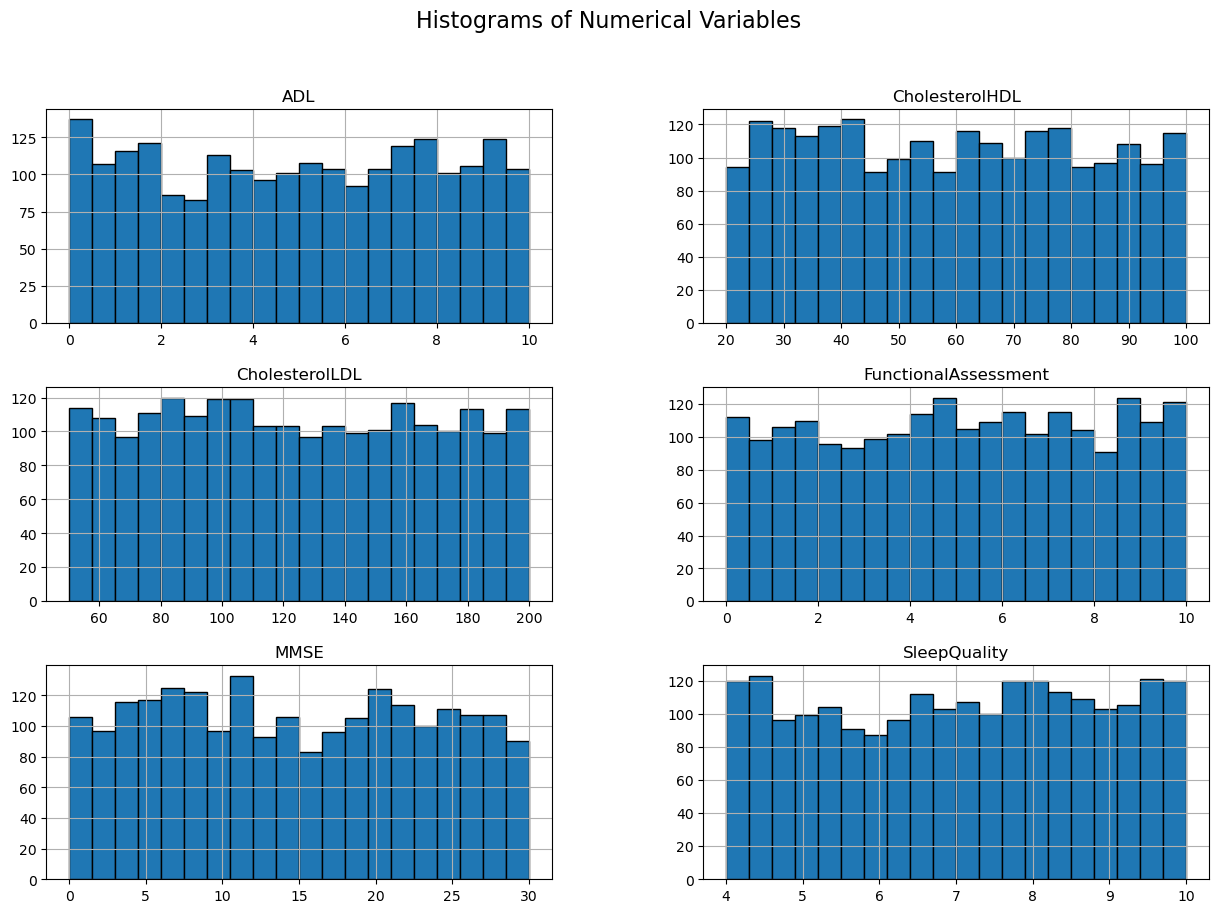

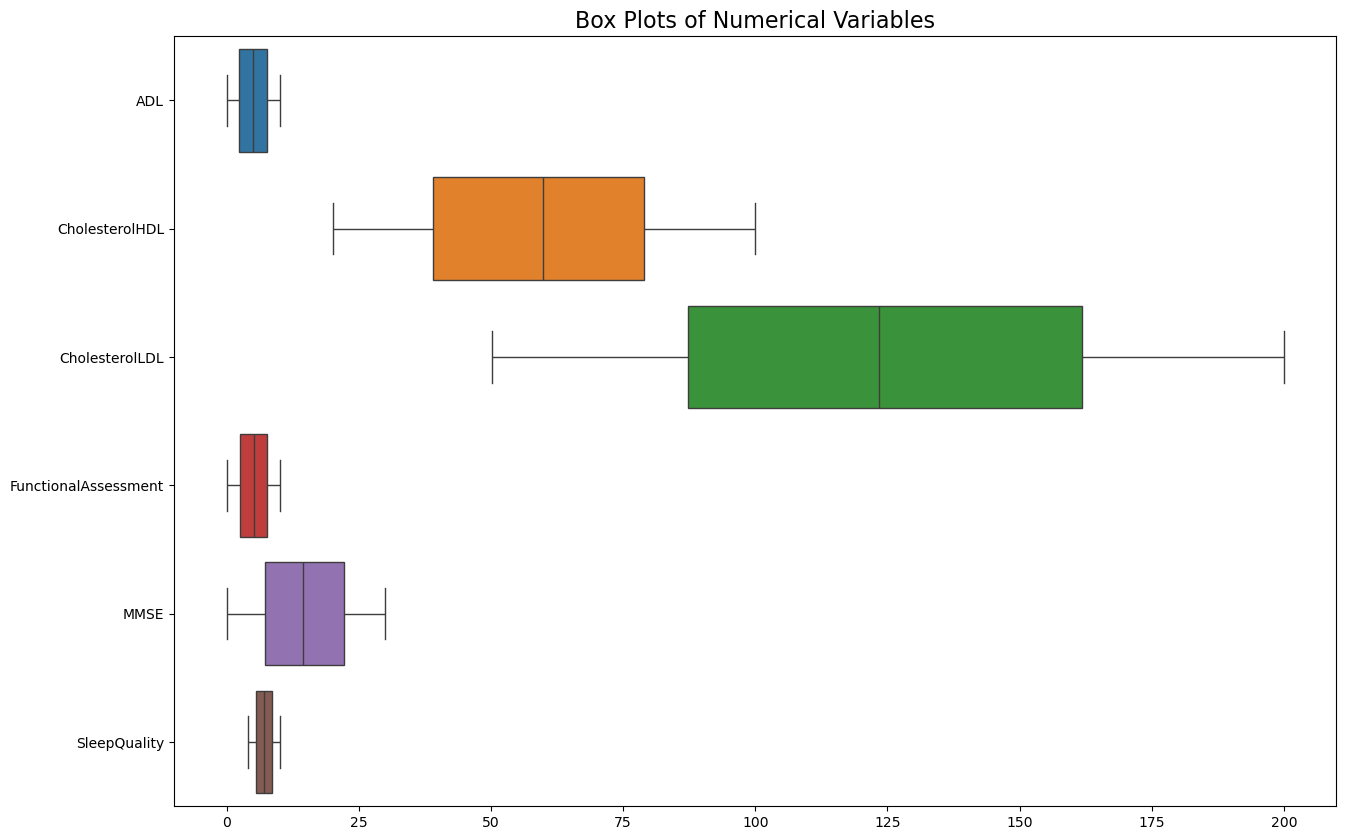

In [9]:
# Identify categorical columns with only 0 or 1 values, or exactly 4 unique values
categorical_columns = df_filtered.columns[(df_filtered.nunique() == 2) | (df_filtered.nunique() == 4)]
numerical_columns = df_filtered.columns[(df_filtered.nunique() > 2) & (df_filtered.nunique() != 4)]

df_categorical = df_filtered[categorical_columns]
df_numerical = df_filtered[numerical_columns]

# Plot histograms for numerical columns
df_numerical.hist(figsize=(15, 10), bins=20, edgecolor='black')
plt.suptitle('Histograms of Numerical Variables', fontsize=16)
plt.show()

# Box plots for numerical columns
plt.figure(figsize=(15, 10))
sns.boxplot(data=df_numerical, orient='h')
plt.title('Box Plots of Numerical Variables', fontsize=16)
plt.show()


It is also useful to apply some of the most common statistical measures like standard deviation and average on the data. Below this is done first on the unscaled data, and then on the scaled data to see how the data compares after being standardized by a scaling method.

In [10]:
# Calculate statistics for numerical variables
numerical_stats = df_numerical.describe().T
numerical_stats['std'] = df_numerical.std()  # Add standard deviation
numerical_stats['var'] = df_numerical.var()  # Add variance

# Display the statistics
print(numerical_stats)

                       count        mean        std        min        25%  \
ADL                   2149.0    4.982958   2.949775   0.001288   2.342836   
CholesterolHDL        2149.0   59.463533  23.139174  20.003434  39.095698   
CholesterolLDL        2149.0  124.335944  43.366584  50.230707  87.195798   
FunctionalAssessment  2149.0    5.080055   2.892743   0.000460   2.566281   
MMSE                  2149.0   14.755132   8.613151   0.005312   7.167602   
SleepQuality          2149.0    7.051081   1.763573   4.002629   5.482997   

                             50%         75%         max          var  
ADL                     5.038973    7.581490    9.999747     8.701171  
CholesterolHDL         59.768237   78.939050   99.980324   535.421368  
CholesterolLDL        123.342593  161.733733  199.965665  1880.660612  
FunctionalAssessment    5.094439    7.546981    9.996467     8.367965  
MMSE                   14.441660   22.161028   29.991381    74.186375  
SleepQuality            7.11

In [11]:
categorical_columns_sc = df_filtered_sc.columns[(df_filtered_sc.nunique() == 2) | (df_filtered_sc.nunique() == 4)]
numerical_columns_sc = df_filtered_sc.columns[(df_filtered_sc.nunique() > 2) & (df_filtered_sc.nunique() != 4)]

df_categorical_sc = df_filtered_sc[categorical_columns]
df_numerical_sc = df_filtered_sc[numerical_columns]

# Calculate statistics for numerical variables
numerical_stats = df_numerical_sc.describe().T
numerical_stats['std'] = df_numerical_sc.std()  # Add standard deviation
numerical_stats['var'] = df_numerical_sc.var()  # Add variance

# Display the statistics
print(numerical_stats)

                       count      mean       std  min       25%       50%  \
ADL                   2149.0  0.498244  0.295023  0.0  0.234191  0.503846   
CholesterolHDL        2149.0  0.493394  0.289323  0.0  0.238722  0.497204   
CholesterolLDL        2149.0  0.494909  0.289622  0.0  0.246870  0.488275   
FunctionalAssessment  2149.0  0.508162  0.289390  0.0  0.256685  0.509601   
MMSE                  2149.0  0.491889  0.287238  0.0  0.238854  0.481435   
SleepQuality          2149.0  0.508312  0.294065  0.0  0.246843  0.519077   

                           75%  max       var  
ADL                   0.758137  1.0  0.087039  
CholesterolHDL        0.736908  1.0  0.083708  
CholesterolLDL        0.744669  1.0  0.083881  
FunctionalAssessment  0.754954  1.0  0.083747  
MMSE                  0.738867  1.0  0.082506  
SleepQuality          0.760335  1.0  0.086475  


### Observations

The plots show how the data is distributed for the numerical variables in the data set. The following observations can be made:
* The different numerical variables have very similar variance - It looks like all the variables have more or less the same variance, at least after scaling. This looks like a somewhat unnatural occurence, since one would expect that different, seemingly unrelated metrics, would have different variance.
* The data looks very uniformly distributed - The histograms show that the values for the different categories are more or less uniformly distributed, which means that there is no discernable clumping of data around certain values.

The bivariate analysis of the numerical variables reveal that there are remarkable similarities in the way the variables are distributed. All of them have more or less a uniform distribution, which can have many different explainations. One possible explaination is that the nature of the data that has been observed is simply that such a variation is expected. Without any deeper knowledge of the medicinal process that is behind the survey we cannot say that the data looks unnatural.
Another explaination could be that some kind of standardization method has been applied to the data beforehand, that has not been informed about in the documentation of the data set.
A third possible explaination is that there is something with the selection process of patients for the survey that has added a bias to the data, and caused the observed patterns. Again, without knowing anything about the procedure behind the retrieval of the data we cannot say anything about this for sure.

Many possible explainations exist that could explain the patterns we are observing, but as we do not have any concrete evidence to make any assumptions about the data, the analysis will proceed as normal.

## Part 4 - Bivariate analysis

This section will examine the variables in relation to each other, mainly by comparing their correlation. It will also be discussed why 

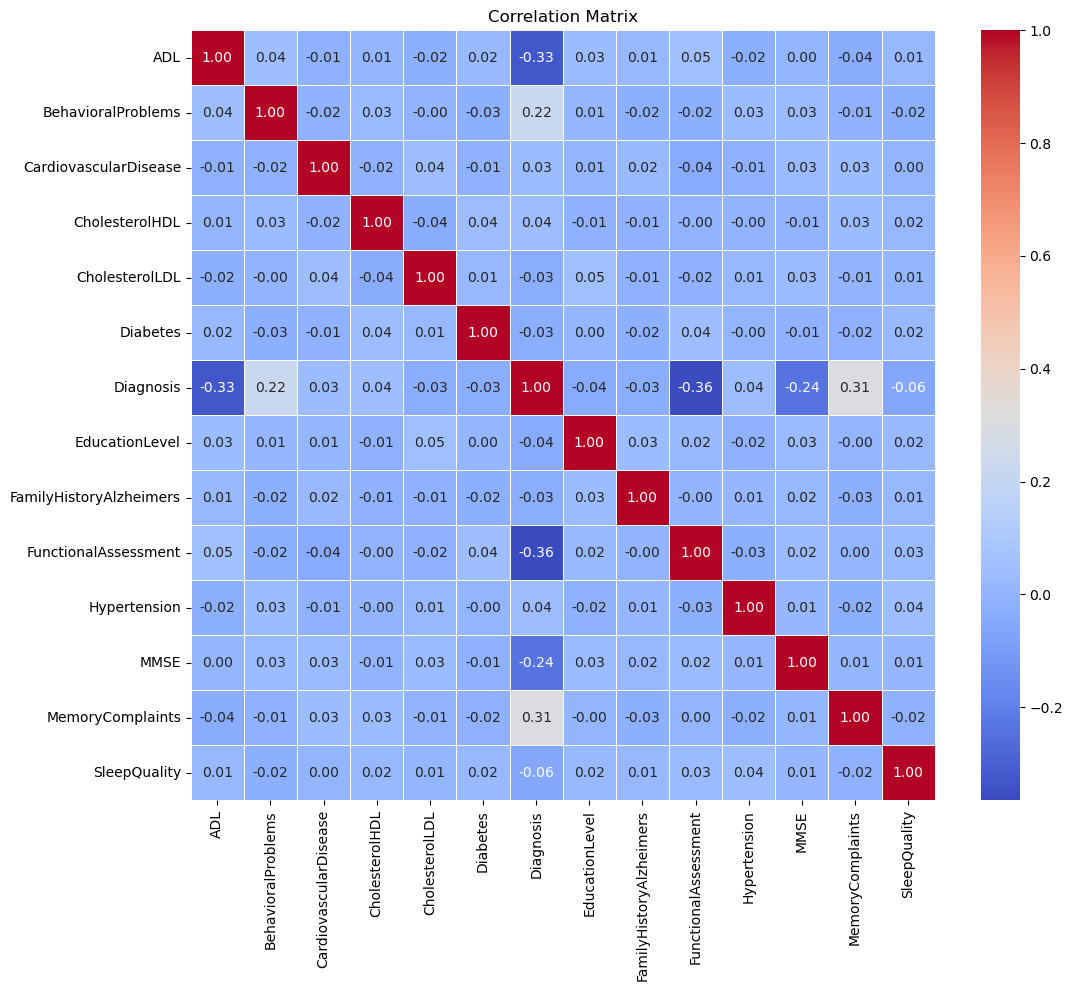

In [12]:
corr_values = df_filtered_sc.corr()["Diagnosis"].drop("Diagnosis")
corr_values = corr_values.reindex(corr_values.abs().sort_values(ascending=False).index)
correlation_matrix = df_filtered.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

#### Feature Engineering Considerations  

We have decided **not** to create new features from existing ones. Typically, feature engineering can help improve model performance by capturing hidden relationships within the data. However, after examining the **correlation matrix**, we observed that there were no particularly strong correlations between variables.  

This was somewhat unexpected, as we might assume that certain variables—such as **BMI and diabetes**—would have a stronger relationship. However, since the data does not indicate clear multicollinearity or strong linear dependencies, we opted to proceed without generating additional features at this stage.  

Instead, we will focus on model training and evaluation to determine whether further feature engineering is necessary based on model performance.

## Part 5 - Data Preparation  

In this step, we divide the dataset into training and test sets to ensure that our model can generalize well to unseen data. We use the `train_test_split` function from `sklearn.model_selection`, allocating 80% of the data for training and 20% for testing. The `random_state` parameter is set to 13 to ensure reproducibility.

In [13]:
from sklearn.model_selection import train_test_split
X = df_sc.drop(columns=["Diagnosis"])
y = df_sc["Diagnosis"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

# Conclusion
This project has shown a first glance at a dataset about Alzheimer's patients. The dataset contains data on over 2100 patients, where some of them have gotten the Alzheimer's diagnosis. For each patient, over 30 data points have been registered.

The first look at the data showed that in general, the correlation between the Diagnosis variable and the other variables is quite low. The correlation between the other variables is also very low.

Lastly, some pre-processing was applied to the data, such as scaling and division into training and test sets.